In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

## Mesh quality indicators

This notebook shows different mesh quality indicators:

- Minimum/maximum angle
- Ratio min/max edge length
- Ratio circumscribed to inscribed circle (largest circle fitting inside vs smallest circle fitting around a triangle)

The indicators are plotted on the mesh and as a histogram.

In [2]:
import numpy as np
import meshio
import matplotlib.pyplot as plt
from nanomesh import metrics
from nanomesh.mesh import TriangleMesh

<IPython.core.display.Javascript object>


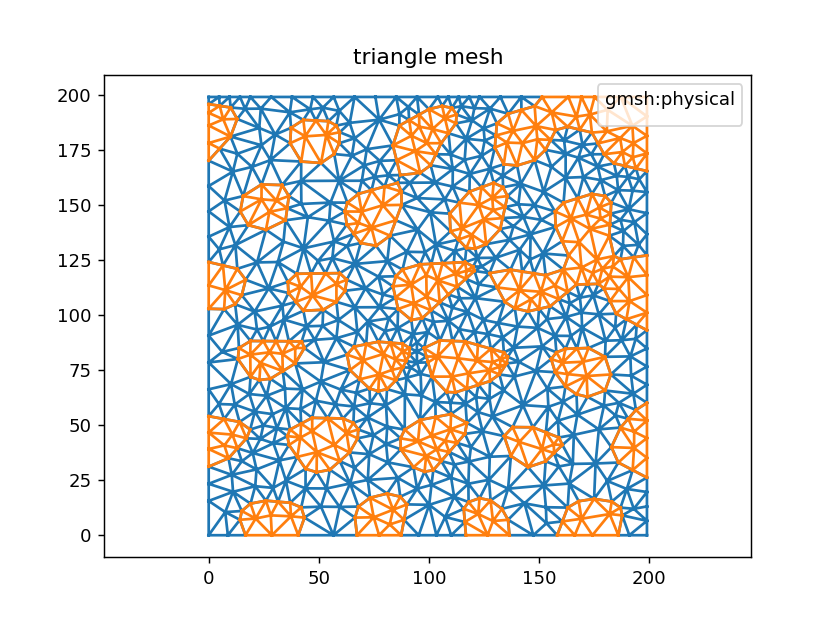

<AxesSubplot:title={'center':'triangle mesh'}>

In [3]:
mesh = TriangleMesh.from_meshio(meshio.read('out.msh'))
mesh.prune_z_0()
mesh.plot()

### Metrics

Quality metrics are available through the `metrics` submodule, for example to access the area for each face:

In [4]:
metrics.area(mesh)

array([39.65259243, 45.70571101, 17.81927029, ..., 38.98781136,
       43.35816492, 41.13174034])

### Minumum and maximum cell angles

`nanomesh.metrics` includes convenience functions for plotting histograms and colored 2d meshes. The `ax` object can be re-used to overlay the mesh triangles.

<IPython.core.display.Javascript object>


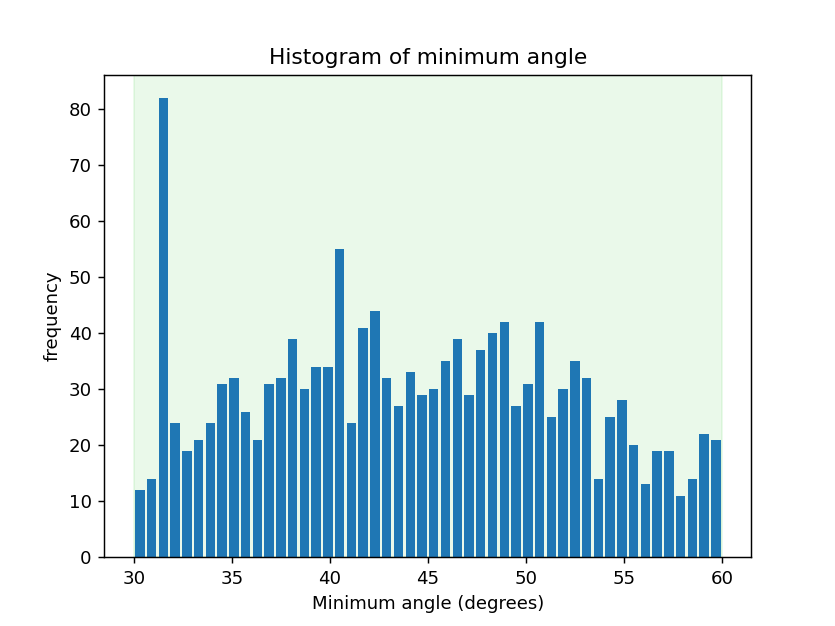

<IPython.core.display.Javascript object>


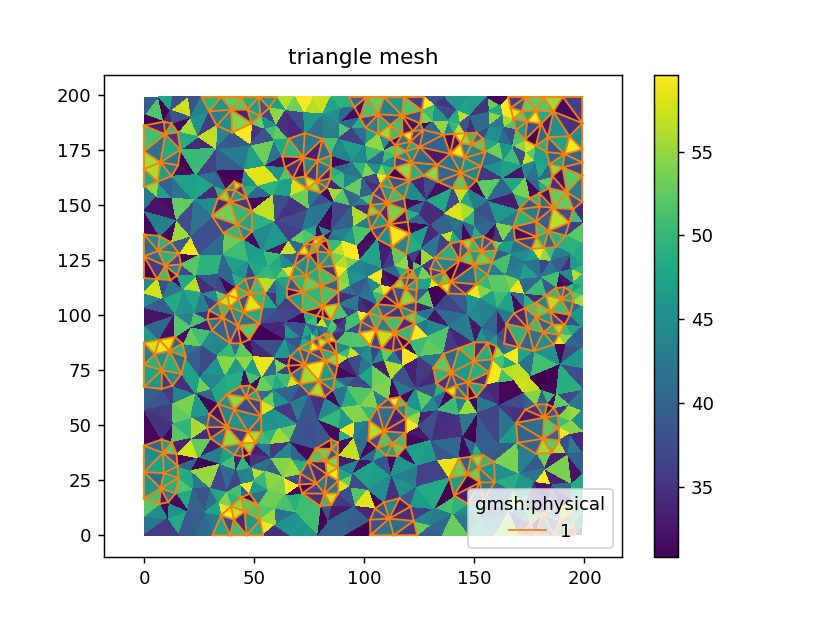

<AxesSubplot:title={'center':'triangle mesh'}>

In [5]:
plot_kwargs = {
    'linewidth': 1, 
    'show_labels': (1,),
    'colors': ('tab:orange',), 
    'flip_xy': True,
    'legend': 'all',
}

metrics.histogram(mesh, metric='min_angle')
ax = metrics.plot2d(mesh, metric='min_angle')
mesh.plot_mpl(ax, **plot_kwargs)

<IPython.core.display.Javascript object>


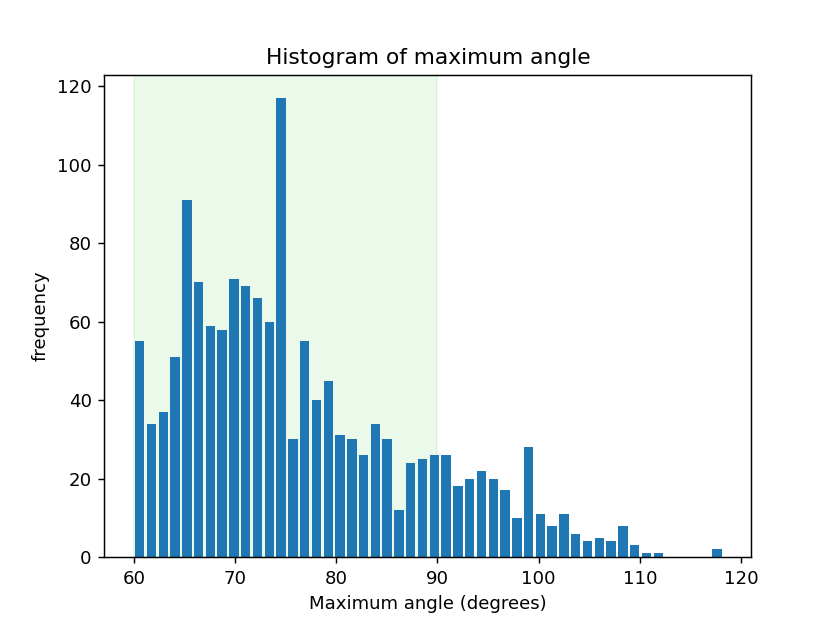

<IPython.core.display.Javascript object>


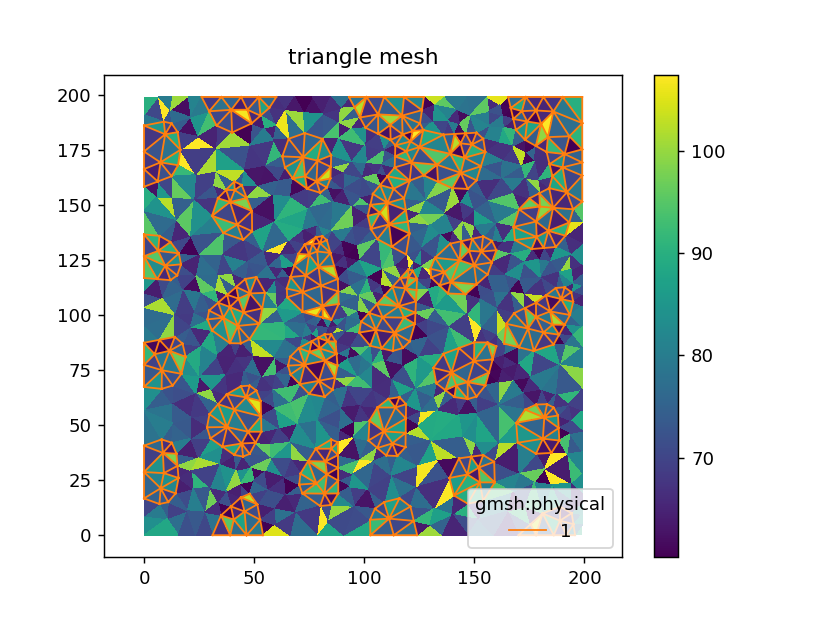

<AxesSubplot:title={'center':'triangle mesh'}>

In [6]:
metrics.histogram(mesh, metric='max_angle')
ax = metrics.plot2d(mesh, metric='max_angle')
mesh.plot_mpl(ax, **plot_kwargs)

### Ratio between radii

https://www.geogebra.org/m/VRE3Dyrn

<IPython.core.display.Javascript object>


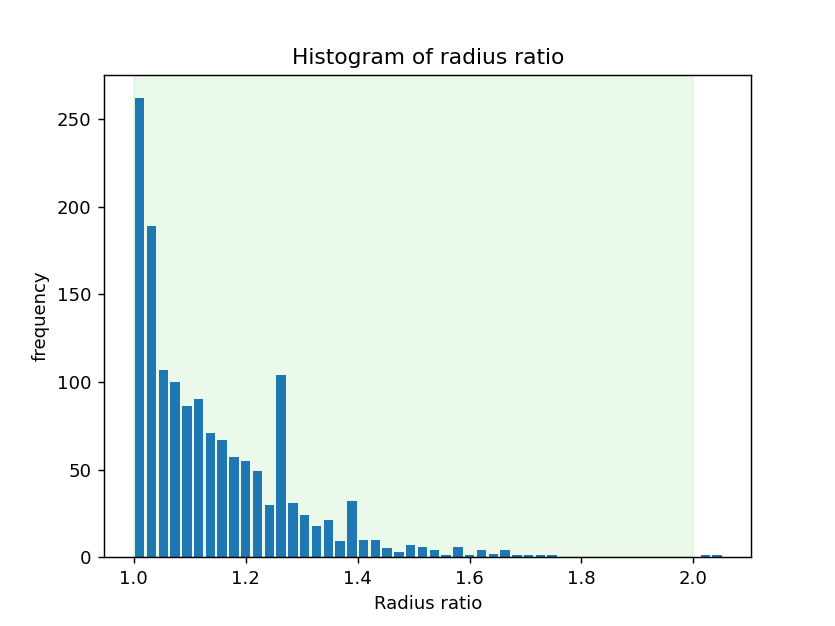

<IPython.core.display.Javascript object>


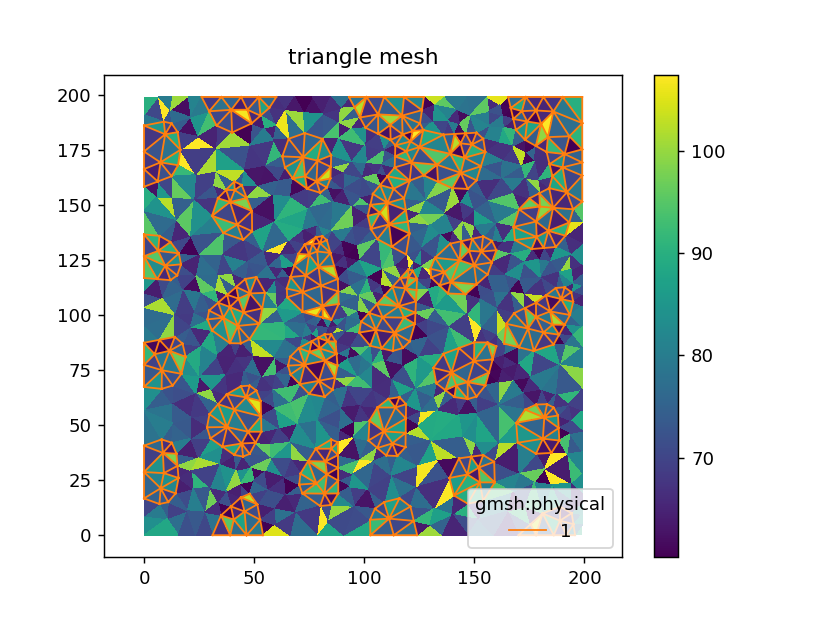

<AxesSubplot:title={'center':'triangle mesh'}>

In [7]:
metrics.histogram(mesh, metric='radius_ratio')
ax = metrics.plot2d(mesh, metric='max_angle')
mesh.plot_mpl(ax, **plot_kwargs)

### Ratio between longest and shortest edge

<IPython.core.display.Javascript object>


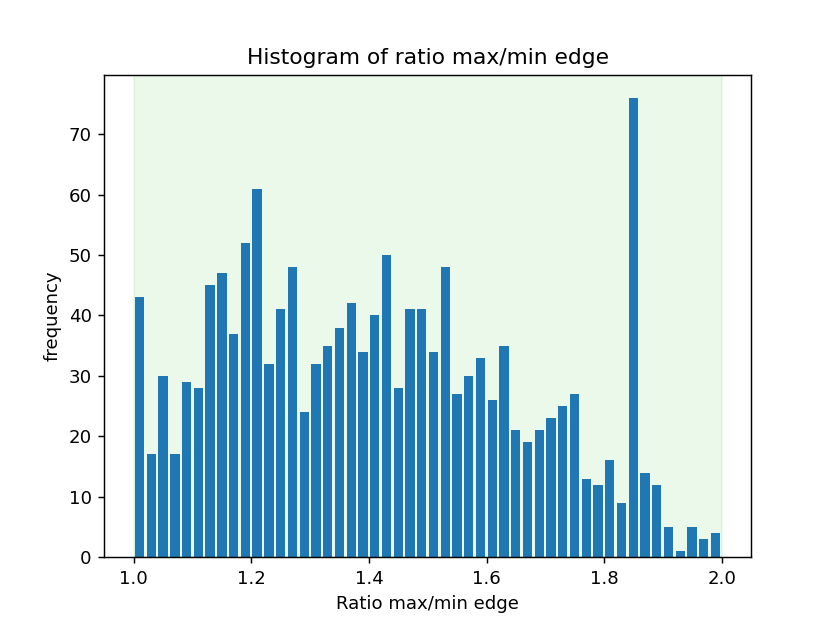

<IPython.core.display.Javascript object>


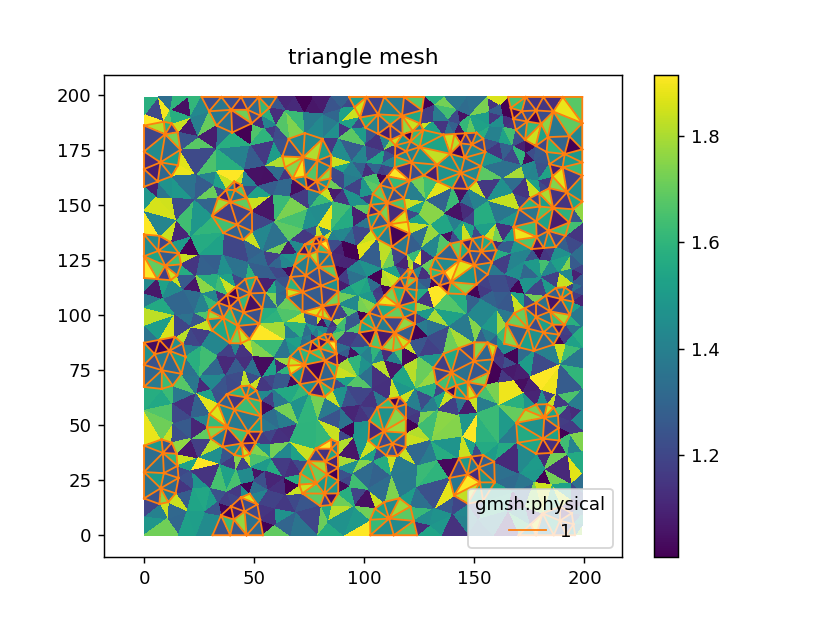

<AxesSubplot:title={'center':'triangle mesh'}>

In [8]:
metrics.histogram(mesh, metric='max_min_edge_ratio')
ax = metrics.plot2d(mesh, metric='max_min_edge_ratio')
mesh.plot_mpl(ax, **plot_kwargs)

### Calculate and export all metrics

This way they can be viewed in another program like Paraview.

In [9]:
metrics.calculate_all_metrics(mesh, inplace=True)
mesh.write("mesh_quality.msh", file_format='gmsh22', binary=False)